## Apartat 2: reescalat de dades

Mostra de les dades originals:
   Alçada (cm)  Pes (kg)
0        167.2      42.0
1        163.4      52.3
2        168.2      53.1
3        173.5      48.3
4        162.8      54.9

Estadístiques de les dades originals:
       Alçada (cm)    Pes (kg)
count   100.000000  100.000000
mean    163.570000   56.829000
std       5.537923    9.825429
min     148.200000   36.800000
25%     160.500000   48.275000
50%     163.450000   57.450000
75%     166.675000   62.150000
max     175.500000   84.600000

Mostra de les dades normalitzades (mètode 1 - StandardScaler):
   Alçada normalitzada  Pes normalitzat
0             0.658783        -1.516850
1            -0.030852        -0.463269
2             0.840265        -0.381437
3             1.802124        -0.872427
4            -0.139742        -0.197316

Estadístiques de les dades normalitzades:
       Alçada normalitzada  Pes normalitzat
count         1.000000e+02     1.000000e+02
mean          1.284528e-15     6.483702e-16
std           1.005038

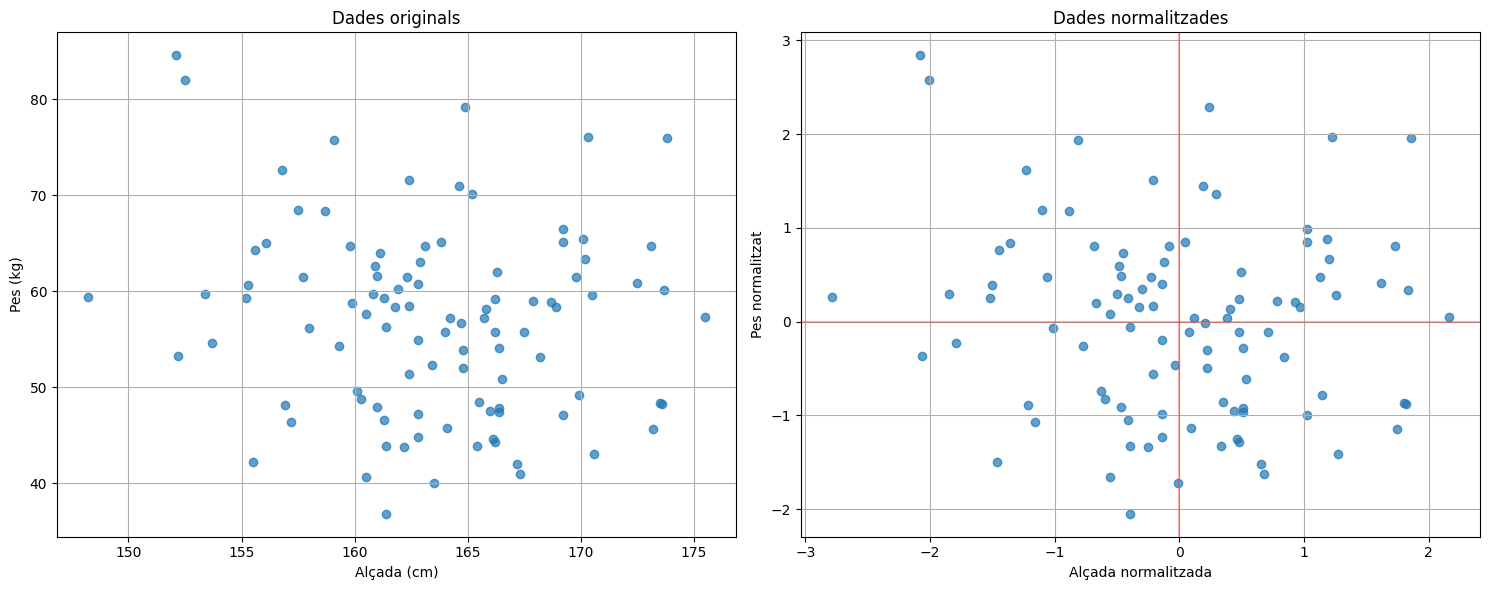

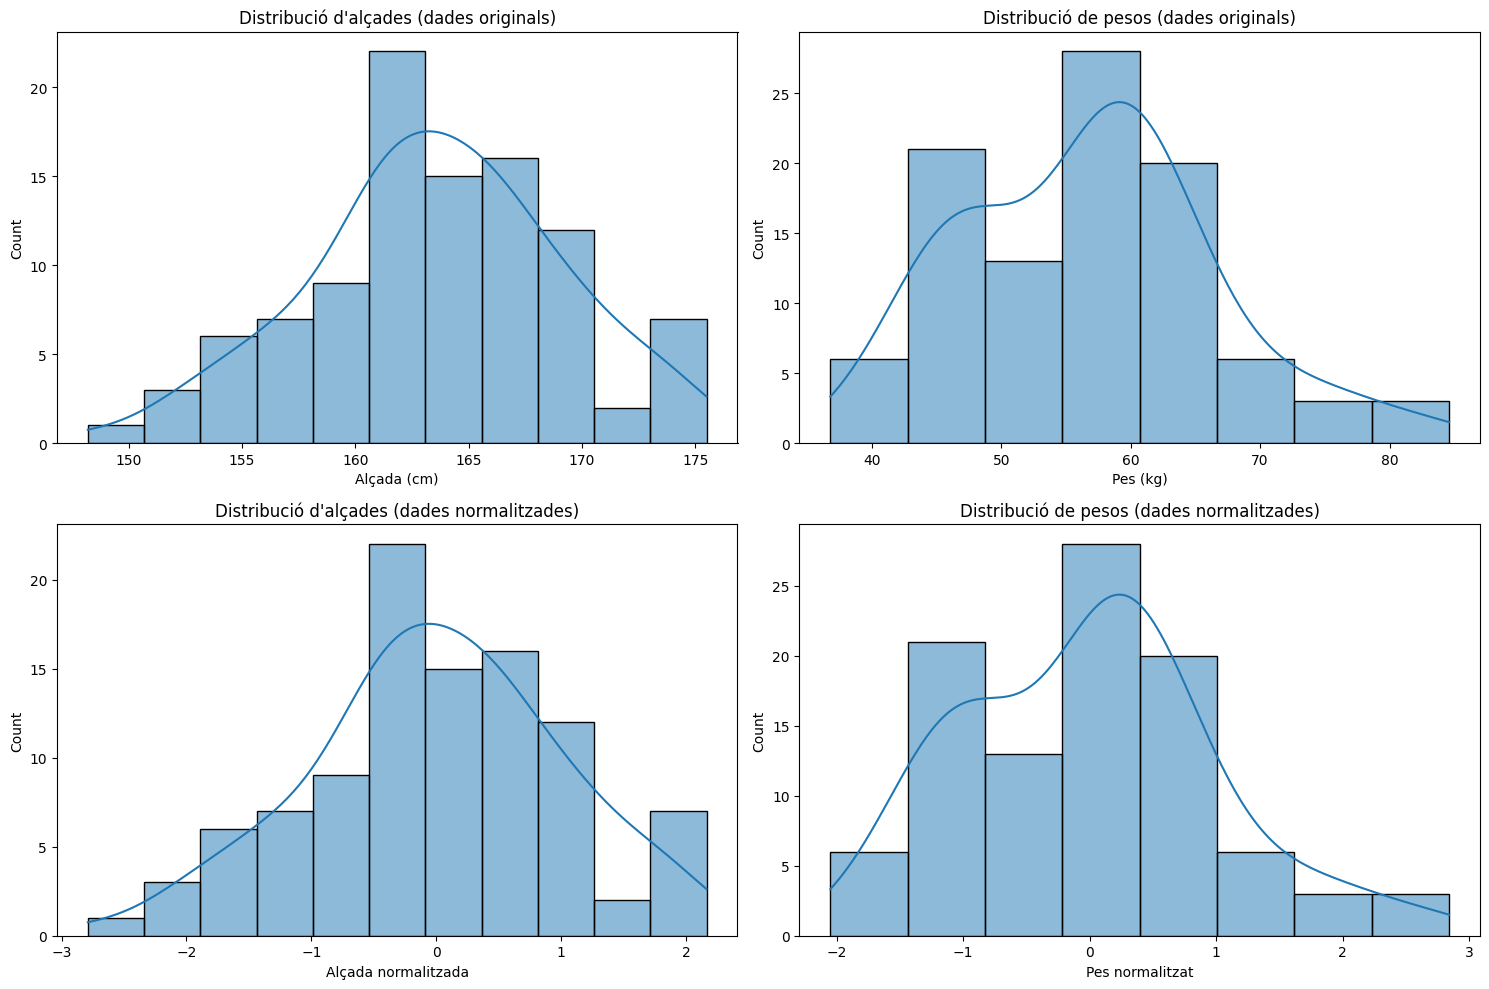

In [2]:
import pandas as pd
import numpy as np
from io import StringIO
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Fixem una llavor per a reproduïbilitat
np.random.seed(42)

# Paràmetres de les distribucions normals
mitjana_alcada = 164.2  # cm
desv_est_alcada = 6.1   # cm
mitjana_pes = 56.6      # kg
desv_est_pes = 10.3     # kg

# Generem les mostres aleatòries amb un decimal de precisió
alcades = np.round(np.random.normal(mitjana_alcada, desv_est_alcada, 100), 1)
pesos = np.round(np.random.normal(mitjana_pes, desv_est_pes, 100), 1)

# Creem un DataFrame amb les dades originals
df_original = pd.DataFrame({
    'Alçada (cm)': alcades,
    'Pes (kg)': pesos
})

print("Mostra de les dades originals:")
print(df_original.head())

# Calculem estadístiques bàsiques per verificar
print("\nEstadístiques de les dades originals:")
print(df_original.describe())

# Apartat 2.1: Normalització de les dades (mitjana 0, desviació estàndard 1)
# Mètode 1: Utilitzant sklearn.preprocessing.StandardScaler
scaler = StandardScaler()
dades_normalitzades = scaler.fit_transform(df_original)

df_normalitzat = pd.DataFrame(dades_normalitzades, columns=['Alçada normalitzada', 'Pes normalitzat'])

print("\nMostra de les dades normalitzades (mètode 1 - StandardScaler):")
print(df_normalitzat.head())
print("\nEstadístiques de les dades normalitzades:")
print(df_normalitzat.describe())

# Mètode 2: Normalització manual
def normalitzar(x):
    return (x - x.mean()) / x.std()

df_normalitzat_manual = pd.DataFrame({
    'Alçada normalitzada': normalitzar(df_original['Alçada (cm)']),
    'Pes normalitzat': normalitzar(df_original['Pes (kg)'])
})

print("\nMostra de les dades normalitzades (mètode 2 - manual):")
print(df_normalitzat_manual.head())
print("\nEstadístiques de les dades normalitzades (manual):")
print(df_normalitzat_manual.describe())

# Visualització de les dades originals i normalitzades
plt.figure(figsize=(15, 6))

# Dades originals
plt.subplot(1, 2, 1)
plt.scatter(df_original['Alçada (cm)'], df_original['Pes (kg)'], alpha=0.7)
plt.title('Dades originals')
plt.xlabel('Alçada (cm)')
plt.ylabel('Pes (kg)')
plt.grid(True)

# Dades normalitzades
plt.subplot(1, 2, 2)
plt.scatter(df_normalitzat['Alçada normalitzada'], df_normalitzat['Pes normalitzat'], alpha=0.7)
plt.title('Dades normalitzades')
plt.xlabel('Alçada normalitzada')
plt.ylabel('Pes normalitzat')
plt.grid(True)
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='r', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.savefig('comparacio_dades.png')

# També podem visualitzar les distribucions
plt.figure(figsize=(15, 10))

# Distribucions originals
plt.subplot(2, 2, 1)
sns.histplot(df_original['Alçada (cm)'], kde=True)
plt.title('Distribució d\'alçades (dades originals)')
plt.xlabel('Alçada (cm)')

plt.subplot(2, 2, 2)
sns.histplot(df_original['Pes (kg)'], kde=True)
plt.title('Distribució de pesos (dades originals)')
plt.xlabel('Pes (kg)')

# Distribucions normalitzades
plt.subplot(2, 2, 3)
sns.histplot(df_normalitzat['Alçada normalitzada'], kde=True)
plt.title('Distribució d\'alçades (dades normalitzades)')
plt.xlabel('Alçada normalitzada')

plt.subplot(2, 2, 4)
sns.histplot(df_normalitzat['Pes normalitzat'], kde=True)
plt.title('Distribució de pesos (dades normalitzades)')
plt.xlabel('Pes normalitzat')

plt.tight_layout()
plt.savefig('distribucions.png')

# Concatenar els DataFrames original i normalitzat per a tenir-ho tot junt
df_complet = pd.concat([df_original, df_normalitzat], axis=1)
print("\nDataFrame complet (originals i normalitzades):")
print(df_complet.head())

# Guardem el DataFrame normalitzat a un CSV
df_normalitzat.to_csv('dades_normalitzades.csv', index=False)
print("\nDataFrame amb dades normalitzades guardat a 'dades_normalitzades.csv'")